# Mini Project

## CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###

## Authors: 
### <li> Manav Maheshwari (3759768) </li>
### <li> Reyaansh Vohra (3758608)</li>

## Introduction
### This project analyses crime patterns across Canada, focusing on how socioeconomic factors like income, education, and demographics influence crime rates. By comparing regions, especially urban centres like Toronto and Vancouver it explores trends, disparities, and possible correlations. The study also highlights challenges such as regional inequality and data gaps, while identifying opportunities for targeted policy actions and community improvements. Through data analysis and visualization, the project aims to deepen understanding of crime in Canada within its broader social context.


## Issue
### This project analyses crime rate trends and the severity of crimes across Canada, focusing on identifying patterns across different provinces and territories. By examining historical data, we can determine how crime rates have evolved over time and what factors may influence these changes. Our analysis will highlight regional differences in crime severity, helping to provide insights into trends, potential causes, and their implications for law enforcement and policymaking.



## Approach

### **1)	Data Collection**
### Crime data was sourced from public datasets across Canadian regions, along with socioeconomic indicators like income and education from Statistics Canada, the City of Toronto and the City of Vancouver.
### **2)	Data Cleaning**
### Datasets were cleaned and standardized for consistency in format, geography, and time periods. Missing values were addressed appropriately.
### **3)	Data Integration**
### Crime and socioeconomic data were merged to allow for meaningful comparison and correlation analysis.
### 4)	**Exploratory Data Analysis (EDA)**
### Visual tools such as bar charts, time-series and scatterplot graphs were used to reveal trends and relationships between crime and socioeconomic factors.
### 5)	**Insights and Opportunities**
### The analysis highlighted key challenges like inequality and data gaps, while also pointing to actionable opportunities for targeted interventions and policymaking.

# Library Installation (uncomment if required)

In [44]:
# # %pip install pandas
# # %pip install matplotlib
# # %pip install seaborn
# %pip install statsmodels

## Importing Libraries


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Datasets

In [46]:

#Vancouver related datasets
vancouver_datasets = pd.read_csv("../datasets/Vancouver_all_crimes.csv")
vancouver_population_raw = pd.read_csv("../datasets/Vancouver_population.csv", delimiter = ';')
vancouver_income = pd.read_csv("../datasets/vancouver_income.csv")
#Toronto related datasets
tor_assault_datasets = pd.read_csv("../datasets/Toronto_Assaults.csv")
tor_break_and_enter = pd.read_csv("../datasets/Toronto_break_and_enter.csv")
tor_homicides = pd.read_csv("../datasets/Toronto_Homicides.csv")
toronto_population_raw = pd.read_csv("../datasets/Toronto_Population.csv", delimiter = ';')
toronto_income = pd.read_csv("../datasets/toronto_income.csv")



## Data Cleaning

### Cleaning of Toronto Population Dataset

In [47]:
year_raw = toronto_population_raw.iloc[8, 0]
population_raw = toronto_population_raw.iloc[10, 0]
#Cleaning the data
year = [int(year.replace('"', '').strip()) for year in year_raw.split(',')[1:]]
population = [int(population.replace('"', '').strip()) for population in population_raw.split(',')[2:]]
#printing it as a dataframe
toronto_population = pd.DataFrame({"Year": year, "Population": population})
toronto_population

,Year,Population
0,2014,5998737
1,2015,6045240
2,2016,6125013
3,2017,6217328
4,2018,6337780
5,2019,6462898
6,2020,6543886
7,2021,6547381
8,2022,6685621


### Cleaning of Vancouver Population Dataset

In [48]:
year_raw = vancouver_population_raw.iloc[8, 0]
population_raw = vancouver_population_raw.iloc[10, 0]
#Cleaning the data
year = [int(year.replace('"', '').strip()) for year in year_raw.split(',')[1:]]
population = [int(population.replace('"', '').strip()) for population in population_raw.split(',')[2:]]
#printing it as a dataframe
vancouver_population = pd.DataFrame({"Year": year, "Population": population})
vancouver_population

,Year,Population
0,2014,2507414
1,2015,2544484
2,2016,2582202
3,2017,2616904
4,2018,2658582
5,2019,2709277
6,2020,2743765
7,2021,2764932
8,2022,2842730


### Cleaning of Vancouver Crime Dataset

In [49]:
vd = vancouver_datasets.sort_values(by = 'YEAR', ascending=True)
sorted_values = ['Offence Against a Person', 'Homicide', 'Break and Enter Commercial', 'Break and Enter Residential/Other']

vd['CRIMES'] = vd['TYPE']
vancouver_dataset = vd[vd['CRIMES'].isin(sorted_values)][['CRIMES', 'YEAR', 'NEIGHBOURHOOD']]

vancouver_dataset = vancouver_dataset[(vancouver_dataset['YEAR'] > 2013) & (vancouver_dataset['YEAR'] < 2025)]

vancouver_dataset['CRIMES'] = vancouver_dataset['CRIMES'].replace({
    'Break and Enter Commercial': 'Break and Enter',
    'Break and Enter Residential/Other': 'Break and Enter',
    'Offence Against a Person' : 'Assault'
})


vancouver_dataset


,CRIMES,YEAR,NEIGHBOURHOOD
4,Break and Enter,2014,West End
22,Break and Enter,2014,West End
12,Break and Enter,2014,West End
13,Break and Enter,2014,West End
163,Break and Enter,2014,Central Business District
...,...,...,...
267824,Assault,2024,Central Business District
267823,Assault,2024,Central Business District
45165,Break and Enter,2024,Marpole
267820,Assault,2024,Central Business District


### Cleaning of Toronto Crime Dataset

In [50]:

#fulfilling the first merge successfully
toronto_first_merge = pd.concat([tor_assault_datasets, tor_break_and_enter], axis=0)
toronto_first_merge['MERGED_CRIMES'] = toronto_first_merge['MCI_CATEGORY'].combine_first(toronto_first_merge['OFFENCE'])
toronto_first_clean = toronto_first_merge.drop(columns = ['MCI_CATEGORY', 'OFFENCE'])

toronto_first_clean.dropna()
#the second cleaning with toronto_homicides
toronto_second_merge = pd.concat([toronto_first_clean, tor_homicides], axis = 0)
toronto_second_merge['CRIMES'] = toronto_second_merge['MERGED_CRIMES'].combine_first(toronto_second_merge['HOMICIDE_TYPE'])


toronto_dataset = toronto_second_merge.drop(columns= ['MERGED_CRIMES', 'HOMICIDE_TYPE'])
toronto_dataset['NEIGHBOURHOOD'] = toronto_dataset['NEIGHBOURHOOD_158']
toronto_dataset['YEAR'] = toronto_dataset['OCC_YEAR'].fillna(0).astype(int)

toronto_dataset['CRIMES'] = toronto_dataset['CRIMES'].replace({
    'Shooting': 'Homicide',
    'Stabbing': 'Homicide',
})

toronto_dataset = toronto_dataset[~toronto_dataset['CRIMES'].isin(['Other'])]
toronto_dataset = toronto_dataset[(toronto_dataset['YEAR'] > 2013) & (toronto_dataset['YEAR'] < 2025)]

toronto_dataset = toronto_dataset[['CRIMES', 'YEAR', 'NEIGHBOURHOOD']].dropna()
toronto_dataset


,CRIMES,YEAR,NEIGHBOURHOOD
0,Assault,2014,Corso Italia-Davenport (92)
1,Assault,2014,Lawrence Park North (105)
2,Assault,2014,Palmerston-Little Italy (80)
4,Assault,2014,West Rouge (143)
5,Assault,2014,West Rouge (143)
...,...,...,...
1476,Homicide,2024,Blake-Jones (69)
1477,Homicide,2024,Englemount-Lawrence (32)
1478,Homicide,2024,Scarborough Village (139)
1479,Homicide,2024,Corso Italia-Davenport (92)


### Cleaning of Toronto Income

In [51]:
toronto_income
toronto_income['Income'] = toronto_income['Median_After_Tax_Income_Toronto_CMA_$']
toronto_income = toronto_income[['Year', 'Income']]
toronto_income

,Year,Income
0,2014,33700
1,2015,34900
2,2016,36200
3,2017,37600
4,2018,39000
5,2019,40200
6,2020,43900
7,2021,43100
8,2022,42000


### Cleaning of Vancouver Income

In [52]:

vancouver_income = vancouver_income.rename(columns={'Median_After_Tax_Income_Vancouver_CMA_$': 'Income'})
vancouver_income = vancouver_income[['Year', 'Income']]
vancouver_income

,Year,Income
0,2014,33400
1,2015,34800
2,2016,36000
3,2017,37400
4,2018,38700
5,2019,40000
6,2020,43600
7,2021,42800
8,2022,41500


## DATA PROCESSING SECTION

### Analyzing crime rates across different cities of Canada.

#### Total Crime Count Per Year For Toronto

In [53]:
toronto_crime_per_year = toronto_dataset.groupby('YEAR').size()

toronto_crime_per_year = toronto_crime_per_year.reset_index(name = 'Crime Count of Toronto')

toronto_crime = toronto_crime_per_year[toronto_crime_per_year['YEAR'] < 2023]
toronto_crime



,YEAR,Crime Count of Toronto
0,2014,24131
1,2015,25155
2,2016,25558
3,2017,26684
4,2018,27802
5,2019,29752
6,2020,25477
7,2021,24956
8,2022,27471


<h4> Total Crime Count Per Year For Vancouver </h4>

In [54]:
vancouver_crime_per_year = vancouver_dataset.groupby('YEAR').size()

vancouver_crime_per_year = vancouver_crime_per_year.reset_index(name = 'Crime Count of Vancouver')

vancouver_crime = vancouver_crime_per_year[vancouver_crime_per_year['YEAR'] < 2023]

vancouver_crime

,YEAR,Crime Count of Vancouver
0,2014,8421
1,2015,8775
2,2016,8881
3,2017,7845
4,2018,7503
5,2019,8240
6,2020,8647
7,2021,7374
8,2022,7213


#### Crime Rate Analysis

#### Toronto

In [55]:
#to merge the crime data with population data
toronto_crime_rate= pd.concat([toronto_crime, toronto_population], axis = 1).fillna(0).astype(int)

toronto_crime_rate["Crime Rate"] = (toronto_crime_rate["Crime Count of Toronto"] / toronto_crime_rate["Population"]) * 100000
#Year is the same and having two of them is redundant.
toronto_analysis = toronto_crime_rate[['YEAR', 'Crime Rate']]

toronto_analysis

,YEAR,Crime Rate
0,2014,402.268011
1,2015,416.112512
2,2016,417.272584
3,2017,429.187587
4,2018,438.670954
5,2019,460.350759
6,2020,389.325242
7,2021,381.160039
8,2022,410.896759


#### Vancouver

In [56]:
vancouver_crime_rate = pd.concat([vancouver_crime, vancouver_population], axis = 1).fillna(0).astype(int)

vancouver_crime_rate["CrimeRate"] = (vancouver_crime_rate["Crime Count of Vancouver"] / vancouver_crime_rate["Population"]) * 100000
#Year is the same and having two of them is redundant.
vancouver_analysis = vancouver_crime_rate[['YEAR', 'CrimeRate']]

vancouver_analysis

,YEAR,CrimeRate
0,2014,335.844021
1,2015,344.863634
2,2016,343.931265
3,2017,299.781727
4,2018,282.218115
5,2019,304.140182
6,2020,315.150897
7,2021,266.697336
8,2022,253.734966


#### Visualization

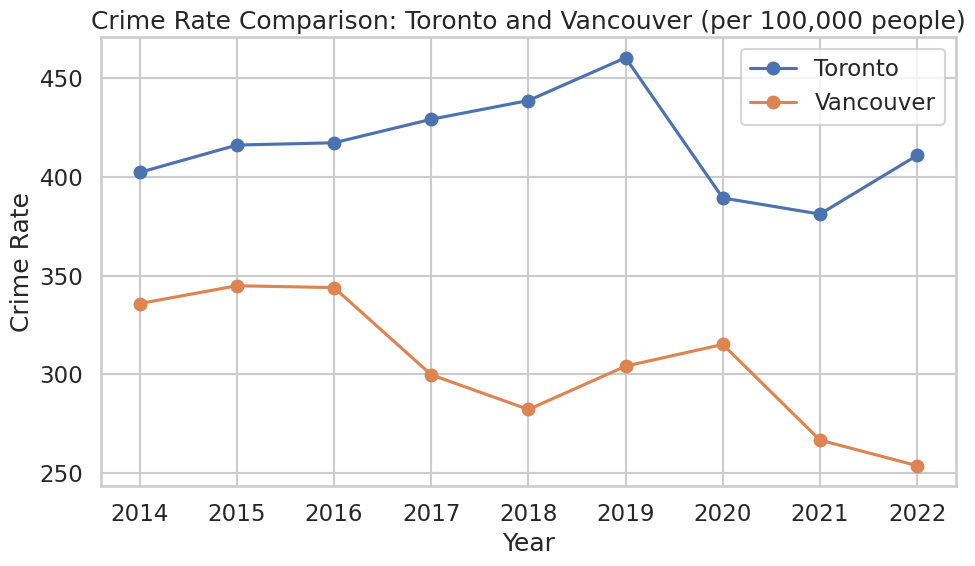

In [57]:

plt.figure(figsize=(10, 6))
plt.plot(toronto_crime_rate["Year"], toronto_crime_rate["Crime Rate"], label="Toronto", marker="o")
plt.plot(vancouver_crime_rate["Year"], vancouver_crime_rate["CrimeRate"], label="Vancouver", marker="o")
plt.title("Crime Rate Comparison: Toronto and Vancouver (per 100,000 people)")
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualize trends over time for various types of crime

#### Vancouver

<Figure size 1400x800 with 0 Axes>

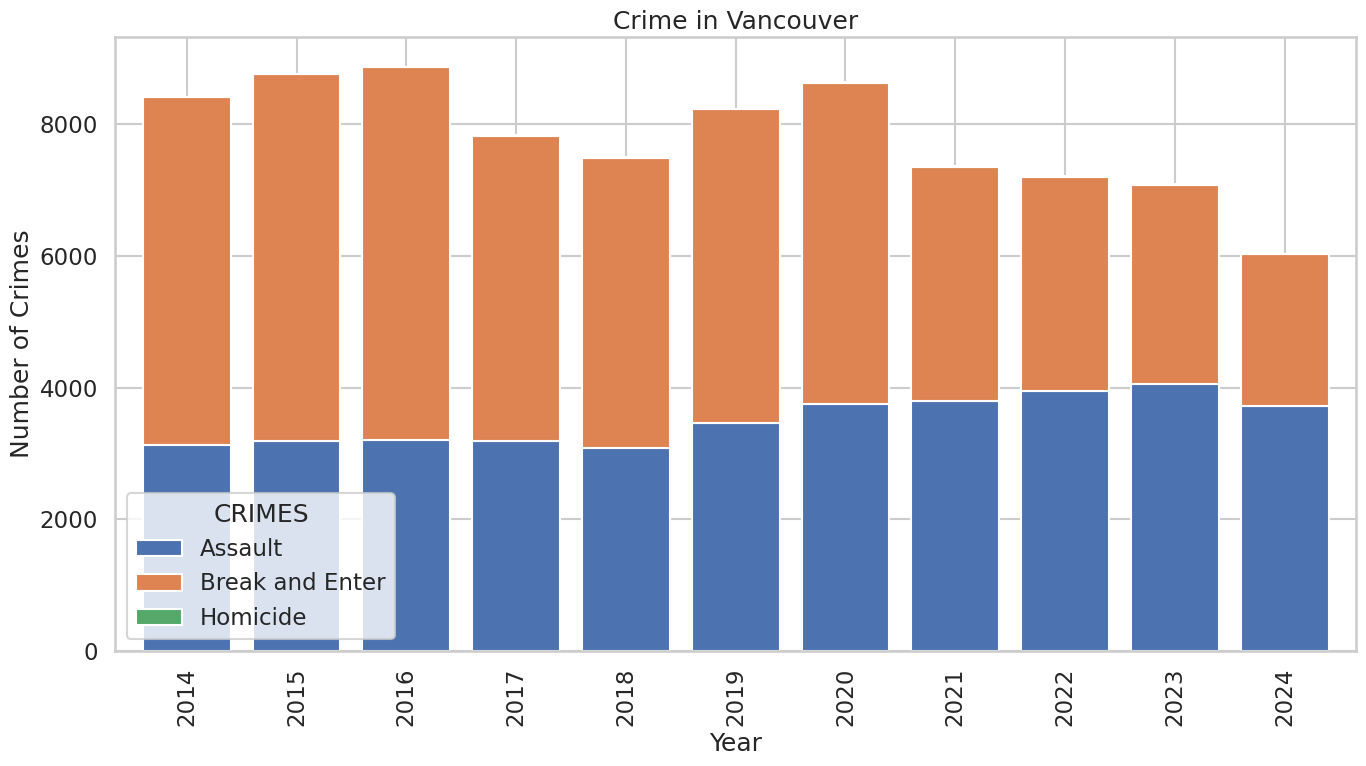

In [58]:

# Group by year and crime type
vd_grouped = vancouver_dataset.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)

# Plot Vancouver crime data
plt.figure(figsize=(14, 8))
vd_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show(block = True)



#### Toronto

<Figure size 1400x800 with 0 Axes>

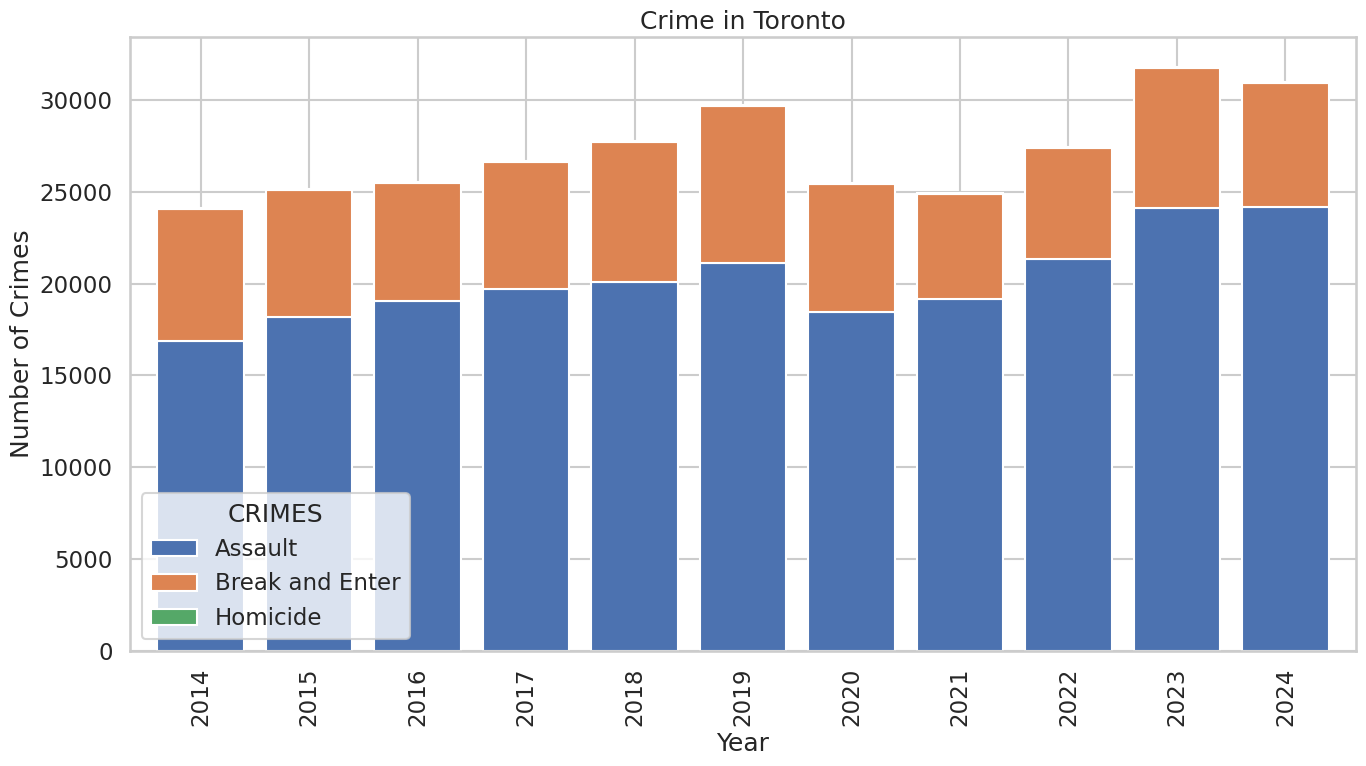

In [59]:


toronto_grouped = toronto_dataset.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
toronto_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


### Analysis to identify regions with higher or lower crime rates

#### Toronto

In [60]:
def zone(neighbourhood):
    if any(keyword in neighbourhood for keyword in ['Agincourt', 'Malvern', 'Bendale', 'Birchcliffe', 'Scarborough', 'Cliffside']):
        return 'Scarborough'
    elif any(keyword in neighbourhood for keyword in ['Alderwood', 'Humber', 'Rexdale', 'Islington', 'Etobicoke', 'Kingsview']):
        return 'Etobicoke'
    elif any(keyword in neighbourhood for keyword in ['Bathurst', 'Bayview', 'Don Mills', 'York Mills', 'Downsview', 'North York']):
        return 'North York'
    elif any(keyword in neighbourhood for keyword in ['Annex', 'Church-Wellesley', 'Bay-Cloverhill', 'Cabbagetown', 'Kensington', 'Downtown']):
        return 'Downtown'
    elif any(keyword in neighbourhood for keyword in ['Broadview', 'Danforth', 'Leaside', 'East York', 'Coxwell']):
        return 'East York'
    else:
        return 'Other'

toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)

toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

toronto_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,19969,6769,29
East York,7644,3038,24
Etobicoke,15021,6128,76
North York,5084,2779,12
Other,162703,54745,442
Scarborough,11872,3472,34


#### Vancouver

In [61]:
def vancouver_zone(neighbourhood):
    if neighbourhood in ['Central Business District', 'West End', 'Stanley Park']:
        return 'Downtown'
    elif neighbourhood in ['Kitsilano', 'Dunbar-Southlands', 'Arbutus Ridge', 'Shaughnessy', 'Kerrisdale', 'West Point Grey']:
        return 'West Side'
    elif neighbourhood in ['Grandview-Woodland', 'Hastings-Sunrise', 'Renfrew-Collingwood', 'Strathcona', 'Kensington-Cedar Cottage']:
        return 'East Vancouver'
    elif neighbourhood in ['Sunset', 'Victoria-Fraserview', 'Marpole', 'Killarney', 'Oakridge', 'South Cambie', 'Musqueam']:
        return 'South Vancouver'
    else:
        return 'Other'
    
vancouver_dataset.loc[:, 'ZONE'] = vancouver_dataset['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vancouver_dataset[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

vancouver_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,17836,11665,54
East Vancouver,12166,12119,54
Other,3280,8220,13
South Vancouver,3577,7281,25
West Side,1664,8069,9


#### Visualizing Toronto's Crimes Based On Zones 

<Figure size 1400x800 with 0 Axes>

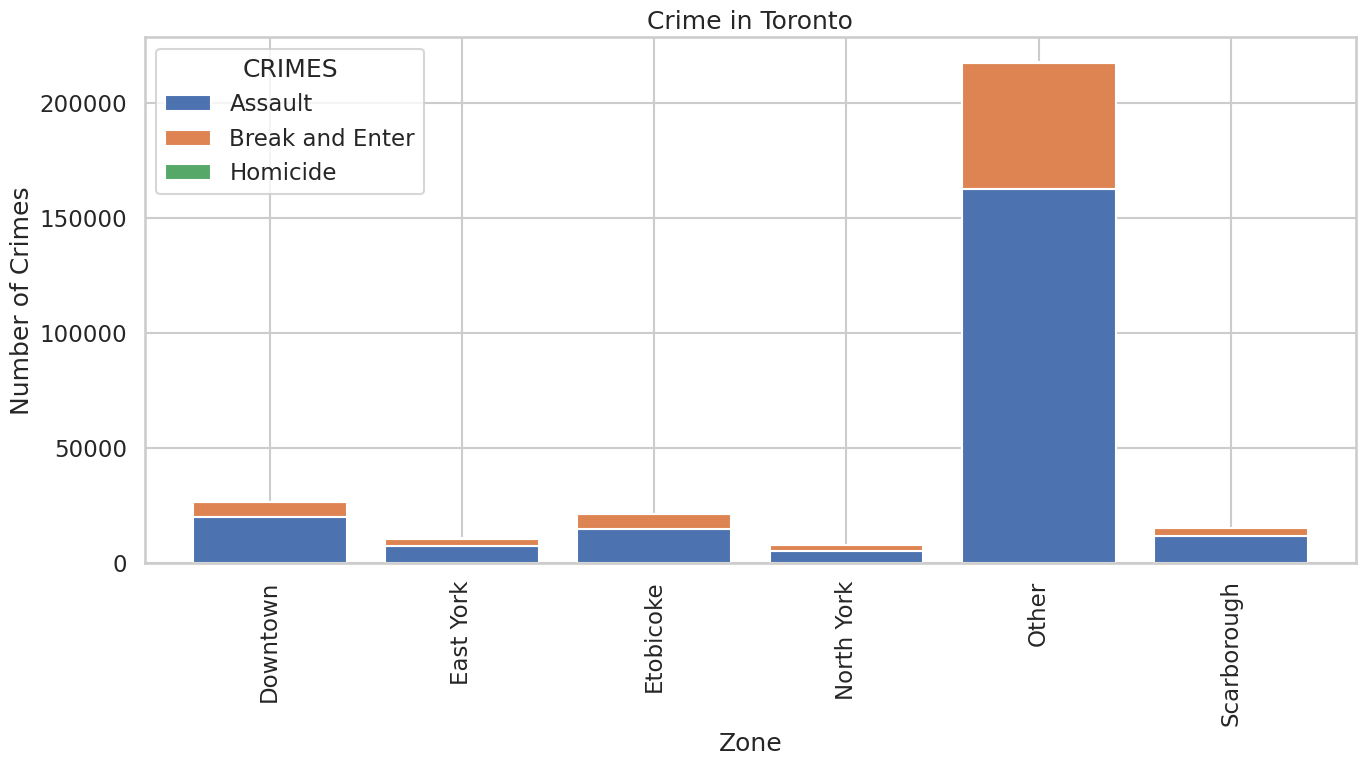

In [62]:
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

plt.figure(figsize=(14, 8))
toronto_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

#### Visualizing Vancouver's Crimes Based On Zones

<Figure size 1400x800 with 0 Axes>

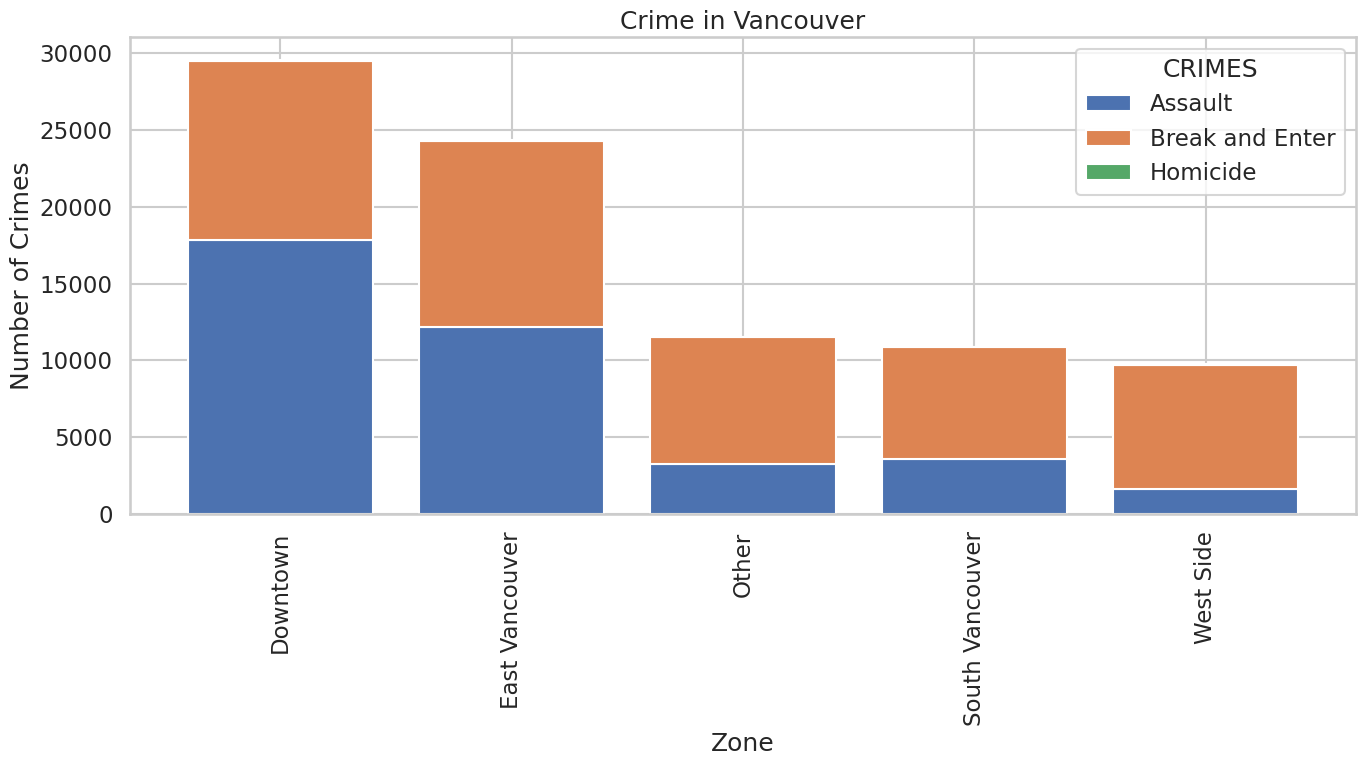

In [63]:
vancouver_dataset.loc[:, 'ZONE'] = vancouver_dataset['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vancouver_dataset[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)
plt.figure(figsize=(14, 8))
vancouver_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

### Compare crime rates with socioeconomic factors such as income levels or education [using income]

#### Toronto


/tmp/ipykernel_27759/2688213549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_analysis.rename(columns={"YEAR": "Year"}, inplace=True)


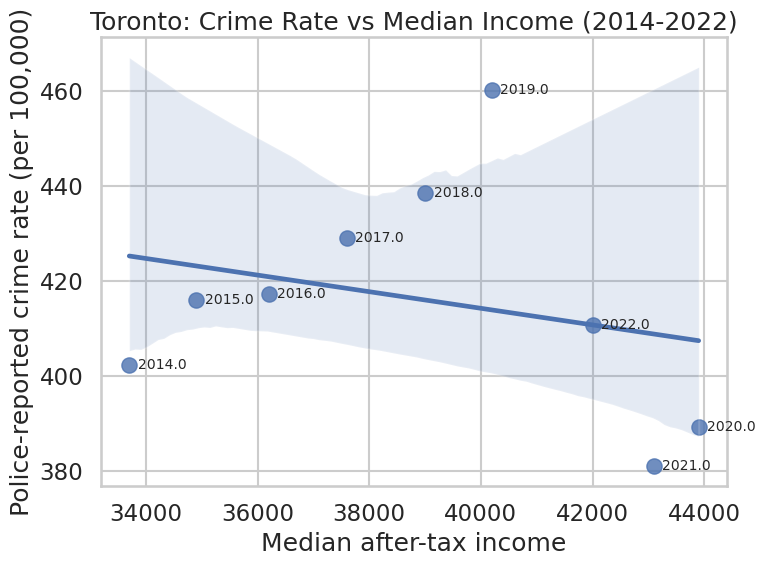

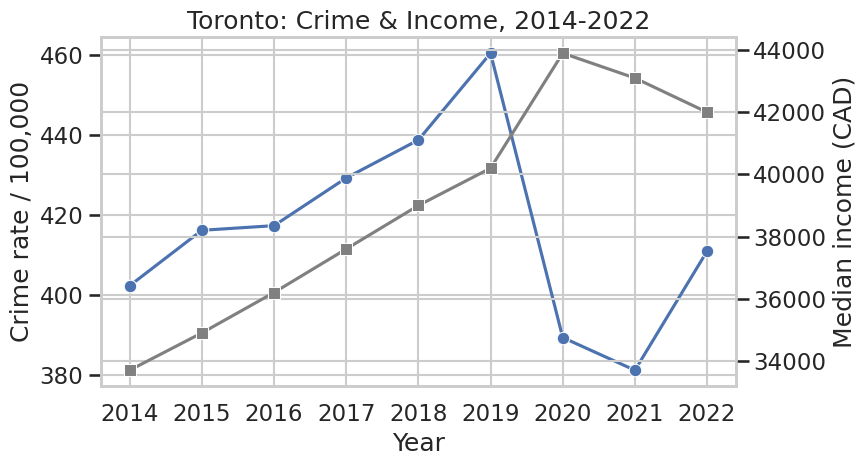

In [64]:
sns.set_theme(style="whitegrid", context="talk")

toronto_analysis.rename(columns={"YEAR": "Year"}, inplace=True)

graph = (
    toronto_analysis[["Year", "Crime Rate"]]
    .merge(toronto_income[["Year", "Income"]], on="Year", how="inner")
)

plt.figure(figsize=(8, 6))
ax = sns.regplot(data=graph,
                 x="Income", y="Crime Rate",
                 ci=95,
                 scatter_kws={"s": 120, "alpha": 0.8})
ax.set(title="Toronto: Crime Rate vs Median Income (2014-2022)",
       xlabel="Median after-tax income",
       ylabel="Police-reported crime rate (per 100,000)")
for _, r in graph.iterrows():
    ax.text(r["Income"] + 150, r["Crime Rate"], r["Year"],
            fontsize=10, va="center")
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(9, 5))
sns.lineplot(data=graph, x="Year", y="Crime Rate", marker="o", ax=ax1)
ax1.set_ylabel("Crime rate / 100,000")

ax2 = ax1.twinx()
sns.lineplot(data=graph, x="Year", y="Income", marker="s", ax=ax2, color="gray")
ax2.set_ylabel("Median income (CAD)")
ax1.set_title("Toronto: Crime & Income, 2014-2022")
plt.tight_layout()
plt.show()




### INFERENCE: 
#### In Toronto, the relationship between income and crime rate appears weaker and more volatile than in Vancouver. While income rose consistently, crime fluctuated significantly—particularly during 2020–2021. This suggests that other factors beyond income, such as public health measures, social support programs, or law enforcement dynamics, may have had greater influence on crime trends during this period

#### Vancouver

/tmp/ipykernel_27759/295657996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vancouver_analysis.rename(columns={"YEAR": "Year"}, inplace=True)


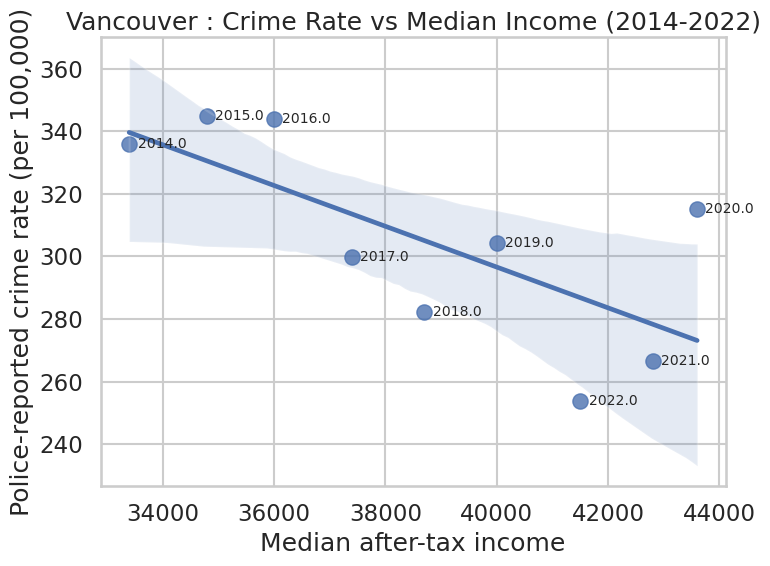

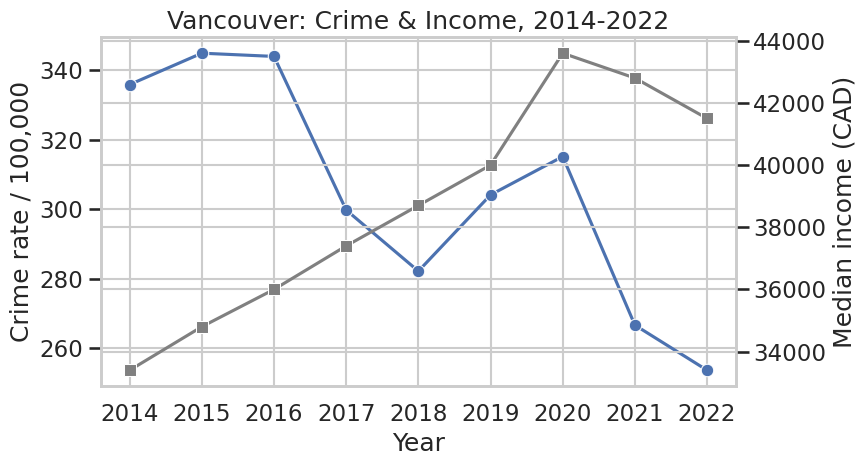

In [65]:
sns.set_theme(style="whitegrid", context="talk")

vancouver_analysis.rename(columns={"YEAR": "Year"}, inplace=True)

graph = (
    vancouver_analysis[["Year", "CrimeRate"]]
    .merge(vancouver_income[["Year", "Income"]], on="Year", how="inner")
)

plt.figure(figsize=(8, 6))
ax = sns.regplot(data=graph,
                 x="Income", y="CrimeRate",
                 ci=95,
                 scatter_kws={"s": 120, "alpha": 0.8})
ax.set(title="Vancouver : Crime Rate vs Median Income (2014-2022)",
       xlabel="Median after-tax income",
       ylabel="Police-reported crime rate (per 100,000)")
for _, r in graph.iterrows():
    ax.text(r["Income"] + 150, r["CrimeRate"], r["Year"],
            fontsize=10, va="center")
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(9, 5))
sns.lineplot(data=graph, x="Year", y="CrimeRate", marker="o", ax=ax1)
ax1.set_ylabel("Crime rate / 100,000")

ax2 = ax1.twinx()
sns.lineplot(data=graph, x="Year", y="Income", marker="s", ax=ax2, color="gray")
ax2.set_ylabel("Median income (CAD)")
ax1.set_title("Vancouver: Crime & Income, 2014-2022")
plt.tight_layout()
plt.show()




### INFERENCE:
#### The analysis shows a moderate negative relationship between median after-tax income and police-reported crime rates in Vancouver. As income steadily increased over the 9-year period, crime rates generally declined—especially between 2017 and 2022. The scatterplot revealed a clear downward trend, supported by the regression line and relatively narrow confidence interval. While year-to-year fluctuations exist, the overall pattern suggests that rising income levels may be linked to improved public safety in the region.



## Identifying Challenges and Opportunities
### Challenges
1) Crime rate disparities:
    Crime level varies significantly between regions, with some areas consistently experiencing higher rates.
2) Income and Education disparities:
    People committing crimes are more common from areas with lower income and education and often commit crimes in areas with higher median income as shown earlier.
3) Limited opportunities:
    High crime regions often lack quality education, jobs, development and infrastructure.

### Opportunities
1) Invest in education and jobs:
    Boosting access to better education and quality job training for work can reduce crime over time.
2) Improve infrastructure:
    Better lighting, clean public spaces, improved transportation and the likes can deter crime over time.
3) Using data for smat policies:
    Data can help in guiding resource allocation to where help and development is needed the most.

## Conclusion
This analysis examined the relationship between median after-tax income and police-reported crime rates in Toronto and Vancouver from 2014 to 2022. In Vancouver, a moderate inverse relationship was observed—higher income levels generally corresponded with lower crime rates. In contrast, Toronto showed a weaker and less consistent association, with fluctuations in crime that were not strongly aligned with income changes. These results suggest that while socioeconomic factors like income may influence crime trends, other contextual factors (e.g., policy, social support, or pandemic effects) also play significant roles.